## **Sift and Hough**
Muhammad Usman Maratib  19i-1791

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


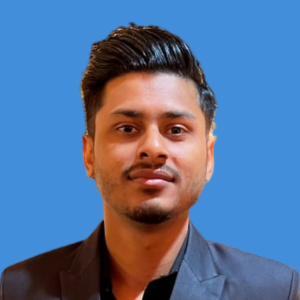

In [2]:
#reading the image
img = cv2.imread('//content/WhatsApp_Image_2023-03-09_at_6.04.42_PM-removebg.jpg')


# resizing image to 300X300
dim = (300, 300)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)


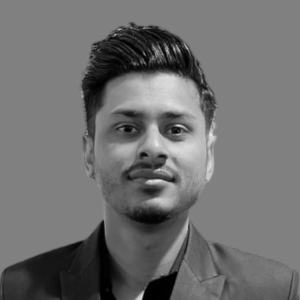

In [3]:
#Changing the image to grayscale
gray_img = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)


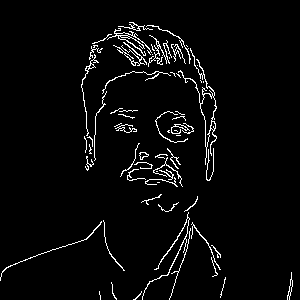

In [4]:
#canny edge detection is used for preprocessing. It uses input image ,the min and max values for edge detection
edges = cv2.Canny(gray_img,100,255)
cv2_imshow(edges)


In [5]:
lines = cv2.HoughLines(edges,1,np.pi/180,2)
#returns an array of (p, Q) values.

In [6]:
for p,Q in lines[0]:
  a = np.cos(Q)
  b = np.sin(Q)
  x0 = a*p
  y0 = b*p
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))

  cv2.line(resized,(x1,y1),(x2,y2),(0,0,255),20)
#Drawing lines in the image

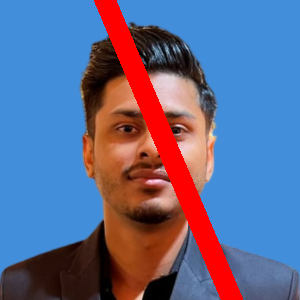

In [7]:
cv2_imshow(resized)

In [8]:
# Define some points in image space
points_image_space = np.array([[100, 50], [200, 150], [300, 250]])

# Find the corresponding lines in parameter space (rho, theta)
lines_parameter_space = cv2.HoughLines(np.uint8(points_image_space), 1, np.pi/180, 2)

# Display the lines in parameter space
print("Lines in Parameter Space:")
print(lines_parameter_space)


Lines in Parameter Space:
[[[ 1.          0.2617994 ]]

 [[ 1.          0.54105204]]

 [[ 0.          2.6354473 ]]

 [[ 0.          2.8972466 ]]

 [[ 0.          0.        ]]

 [[ 1.          1.9547688 ]]

 [[ 0.          2.0071287 ]]

 [[ 1.          2.3038347 ]]

 [[ 0.          2.4609141 ]]

 [[-1.          2.9146998 ]]]


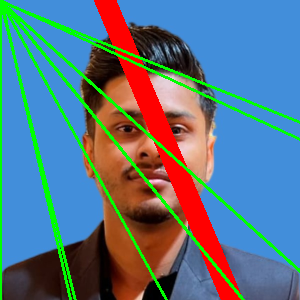

In [11]:
# Extract m, c from lines in parameter space
for line in lines_parameter_space:
    rho, theta = line[0]

    if np.abs(theta - np.pi/2) < 1e-5:
        # Handle vertical line separately
        x = int(rho / np.cos(theta))
        cv2.line(resized, (x, 0), (x, 300), (0, 255, 0), 2)
    elif np.abs(theta) > 1e-5:  # Avoid division by zero when theta is close to 0
        m = -1 / np.tan(theta)
        c = rho / np.sin(theta)

        # Plot lines in image space
        y1 = int(m * 0 + c)
        y2 = int(m * 300 + c)
        cv2.line(resized, (0, y1), (300, y2), (0, 255, 0), 2)

# Display the image with lines in image space
cv2_imshow(resized)


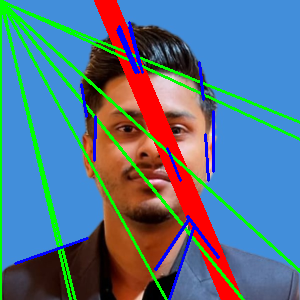

In [12]:
# Use HoughLinesP to find lines in polar coordinates
lines_polar_coordinates = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)

# Draw the lines on the image
for line in lines_polar_coordinates:
    x1, y1, x2, y2 = line[0]
    cv2.line(resized, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with lines in polar coordinates
cv2_imshow(resized)


In [14]:
# HoughLines
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=50)

# HoughLinesP
lines_p = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)


In [16]:
# Define accumulator matrix
accumulator_matrix = np.zeros((300, 180), dtype=int)

# Iterate through edges and accumulate votes in the accumulator matrix
for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i, j] > 0:
            for theta in range(0, 180):
                rho = int(i * np.cos(np.radians(theta)) + j * np.sin(np.radians(theta)))

                #rho and theta are within valid bounds
                if 0 <= rho < 300:
                    accumulator_matrix[rho, theta] += 1


In [17]:
# Find the max value and its coordinates in the accumulator matrix
max_value = np.max(accumulator_matrix)
max_position = np.argwhere(accumulator_matrix == max_value)[0]

print("Max Value:", max_value)
print("Max Position (rho, theta):", max_position)


Max Value: 70
Max Position (rho, theta): [230  79]
